In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.utils import to_categorical
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("/content/dataM.csv")

In [3]:
df.head()

,Unnamed: 0,Total floor area (m²),Total current energy costs over 3 years (£),Current hot water costs over 3 years (£),Part 1 Construction Age Band,Part 1 Floor 0 Room Height,Low Energy Lighting %,Mechanical Ventilation,Tenure,Transaction Type,...,insulated_wall,wall_type,roof_type,floor_type,windows_glazing,MMH_mains gas,MHCS_programmer,low_lighting,SH_room heaters,Current energy efficiency rating band
0,0,45.0,3771.0,1176.0,before 1919,3.10,100,natural,owner-occupied,none of the above,...,0,sandstone or limestone,Pitched,Unknown,double glazed,False,True,low energy lighting 100% of fixed outlets,False,E
1,1,143.0,2793.0,375.0,2003-2007,2.40,100,natural,owner-occupied,marketed sale,...,1,cavity wall,Pitched,Suspended,double glazed,True,True,low energy lighting 100% of fixed outlets,False,C
2,2,65.0,1947.0,441.0,before 1919,2.45,100,natural,owner-occupied,marketed sale,...,0,sandstone or limestone,Unknown,Solid,single glazed,True,True,low energy lighting 100% of fixed outlets,False,C
3,3,49.0,1158.0,195.0,1999-2002,2.40,100,natural,rented (private),none of the above,...,1,cavity wall,Unknown,Suspended,double glazed,True,True,low energy lighting 100% of fixed outlets,False,C
4,4,212.0,6477.0,819.0,before 1919,2.80,64,natural,owner-occupied,marketed sale,...,1,granite or whinstone,Pitched,Solid,double glazed,False,True,low energy lighting 60% of fixed outlets,True,E


In [4]:
df.tail()

,Unnamed: 0,Total floor area (m²),Total current energy costs over 3 years (£),Current hot water costs over 3 years (£),Part 1 Construction Age Band,Part 1 Floor 0 Room Height,Low Energy Lighting %,Mechanical Ventilation,Tenure,Transaction Type,...,insulated_wall,wall_type,roof_type,floor_type,windows_glazing,MMH_mains gas,MHCS_programmer,low_lighting,SH_room heaters,Current energy efficiency rating band
54490,54490,74.0,996.0,210.0,before 1919,2.40,100,natural,owner-occupied,new dwelling,...,0,Unknown,Unknown,Unknown,high performance glazing,True,True,low energy lighting 100% of fixed outlets,False,B
54491,54491,228.0,4674.0,1491.0,2008 onwards,2.40,100,natural,owner-occupied,none of the above,...,1,timber frame,Pitched,Solid,double glazed,False,False,low energy lighting 100% of fixed outlets,False,C
54492,54492,123.0,2292.0,753.0,before 1919,2.43,100,"mechanical, supply and extract",unknown,new dwelling,...,0,Unknown,Unknown,Unknown,high performance glazing,False,False,low energy lighting 100% of fixed outlets,False,B
54493,54493,59.0,972.0,276.0,before 1919,2.41,100,natural,rented (social),new dwelling,...,0,Unknown,Unknown,Unknown,high performance glazing,True,False,low energy lighting 100% of fixed outlets,False,B
54494,54494,77.0,978.0,303.0,before 1919,2.40,100,natural,rented (social),new dwelling,...,0,Unknown,Unknown,Unknown,high performance glazing,True,False,low energy lighting 100% of fixed outlets,False,B


In [5]:
df.describe()

,Unnamed: 0,Total floor area (m²),Total current energy costs over 3 years (£),Current hot water costs over 3 years (£),Part 1 Floor 0 Room Height,Low Energy Lighting %,insulated_wall
count,54495.000000,54495.000000,54495.000000,54495.000000,54495.000000,54495.000000,54495.000000
mean,27247.000000,88.604865,2682.322298,407.240972,2.501650,85.418112,0.576255
std,15731.495797,50.635685,2045.518883,311.853653,0.258544,22.454020,0.494156
min,0.000000,15.000000,552.000000,57.000000,1.000000,1.000000,0.000000
25%,13623.500000,62.000000,1527.000000,234.000000,2.360000,75.000000,0.000000
50%,27247.000000,77.000000,2115.000000,279.000000,2.400000,100.000000,1.000000
75%,40870.500000,98.000000,3114.000000,450.000000,2.570000,100.000000,1.000000
max,54494.000000,983.024000,46076.267400,3370.127700,5.657008,100.000000,1.000000


In [6]:
df.isnull()

,Unnamed: 0,Total floor area (m²),Total current energy costs over 3 years (£),Current hot water costs over 3 years (£),Part 1 Construction Age Band,Part 1 Floor 0 Room Height,Low Energy Lighting %,Mechanical Ventilation,Tenure,Transaction Type,...,insulated_wall,wall_type,roof_type,floor_type,windows_glazing,MMH_mains gas,MHCS_programmer,low_lighting,SH_room heaters,Current energy efficiency rating band
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.value_counts()

Unnamed: 0  Total floor area (m²)  Total current energy costs over 3 years (£)  Current hot water costs over 3 years (£)  Part 1 Construction Age Band  Part 1 Floor 0 Room Height  Low Energy Lighting %  Mechanical Ventilation  Tenure            Transaction Type   wall_insulation           roof_insulation         insulated_wall  wall_type               roof_type  floor_type         windows_glazing           MMH_mains gas  MHCS_programmer  low_lighting                               SH_room heaters  Current energy efficiency rating band
0           45.0                   3771.0                                       1176.0                                    before 1919                   3.100                       100                    natural                 owner-occupied    none of the above  no insulation             150 mm loft insulation  0               sandstone or limestone  Pitched    Unknown            double glazed             False          True             low energy lightin

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54495 entries, 0 to 54494
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   54495 non-null  int64  
 1   Total floor area (m²)                        54495 non-null  float64
 2   Total current energy costs over 3 years (£)  54495 non-null  float64
 3   Current hot water costs over 3 years (£)     54495 non-null  float64
 4   Part 1 Construction Age Band                 54495 non-null  object 
 5   Part 1 Floor 0 Room Height                   54495 non-null  float64
 6   Low Energy Lighting %                        54495 non-null  int64  
 7   Mechanical Ventilation                       54495 non-null  object 
 8   Tenure                                       54495 non-null  object 
 9   Transaction Type                             54495 non-null  object 
 10

In [9]:
# Split data into features and labels
X = df.drop("Current energy efficiency rating band", axis=1)
y = df["Current energy efficiency rating band"]
encoder = LabelEncoder()
y= encoder.fit_transform(y)

# One-hot encode labels
y = to_categorical(y, num_classes=7)

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Define which columns are categorical and which are numerical
categorical_cols = ["Part 1 Construction Age Band", "Mechanical Ventilation", "Tenure", "Transaction Type",
                   "wall_insulation", "roof_insulation", "wall_type", "roof_type", "floor_type",
                   "windows_glazing", "low_lighting"]
numerical_cols = ["Total floor area (m²)", "Total current energy costs over 3 years (£)",
                  "Current hot water costs over 3 years (£)", "Part 1 Floor 0 Room Height",
                  "Low Energy Lighting %", "insulated_wall", "MMH_mains gas", "MHCS_programmer",
                  "SH_room heaters"]

In [12]:
# Create ColumnTransformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

In [13]:
# Fit and transform the data using the ColumnTransformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1363/1363 [==============================] - 6s 4ms/step - loss: 0.8899 - accuracy: 0.6555 - val_loss: 0.5737 - val_accuracy: 0.7748
Epoch 2/10
1363/1363 [==============================] - 9s 6ms/step - loss: 0.6490 - accuracy: 0.7466 - val_loss: 0.4931 - val_accuracy: 0.8116
Epoch 3/10
1363/1363 [==============================] - 9s 6ms/step - loss: 0.5777 - accuracy: 0.7759 - val_loss: 0.4549 - val_accuracy: 0.8291
Epoch 4/10
1363/1363 [==============================] - 9s 7ms/step - loss: 0.5394 - accuracy: 0.7943 - val_loss: 0.4308 - val_accuracy: 0.8370
Epoch 5/10
1363/1363 [==============================] - 5s 3ms/step - loss: 0.5115 - accuracy: 0.8060 - val_loss: 0.4144 - val_accuracy: 0.8426
Epoch 6/10
1363/1363 [==============================] - 4s 3ms/step - loss: 0.4978 - accuracy: 0.8101 - val_loss: 0.4013 - val_accuracy: 0.8462
Epoch 7/10
1363/1363 [==============================] - 4s 3ms/step - loss: 0.4830 - accuracy: 0.8159 - val_loss: 0.3970 - val_accuracy: 0.8438
Epo

In [16]:
# Evaluate model
score = model.evaluate(X_test, y_test)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

341/341 [==============================] - 1s 2ms/step - loss: 0.3796 - accuracy: 0.8534
Test loss:  0.37957704067230225
Test accuracy:  0.8533810377120972


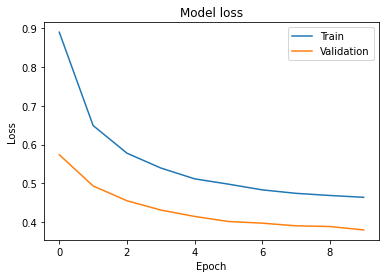

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

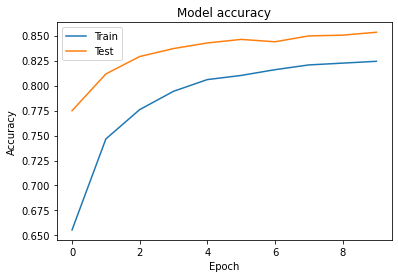

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


341/341 [==============================] - 1s 1ms/step
Average AUC: 0.9768127639554354


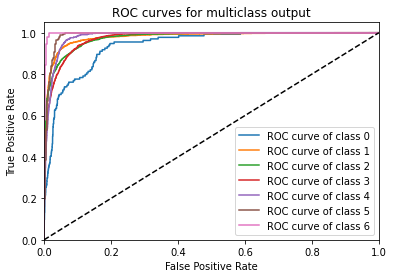

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class
y_pred_proba = model.predict(X_test)

# Compute the average AUC score across all classes
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('Average AUC:', auc)

# Compute the FPR and TPR for each class
fpr = dict()
tpr = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])

# Plot the ROC curve for each class
plt.figure()
for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {}'.format(i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiclass output')
plt.legend(loc="lower right")
plt.show()





In [20]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

#convert one hot encoded y_test to numerical format
y_test = y_test.argmax(axis=1)

# Evaluate model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

341/341 [==============================] - 1s 2ms/step
Accuracy:  0.8533810441324892
Precision:  0.8429176134733636
Recall:  0.8533810441324892
F1 Score:  0.8476383370580427


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


341/341 [==============================] - 1s 3ms/step


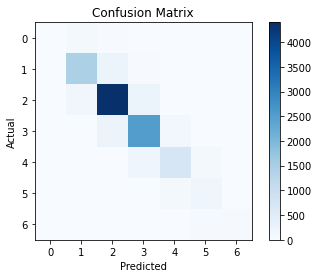

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
conf_matrix

array([[   0,  102,   29,    3,    0,    0,    0],
       [   0, 1455,  231,   30,    2,    0,    0],
       [   0,  151, 4399,  273,    5,    0,    0],
       [   0,    0,  255, 2513,  124,    3,    0],
       [   0,    0,    3,  186,  694,   71,    0],
       [   0,    0,    0,    0,   78,  193,    9],
       [   0,    0,    0,    0,    0,   43,   47]])

In [25]:
pd.crosstab(y_pred, y_test, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,2,3,4,5,6,All
True,,,,,,,,
1,102,1455,151,0,0,0,0,1708
2,29,231,4399,255,3,0,0,4917
3,3,30,273,2513,186,0,0,3005
4,0,2,5,124,694,78,0,903
5,0,0,0,3,71,193,43,310
6,0,0,0,0,0,9,47,56
All,134,1718,4828,2895,954,280,90,10899
